In [185]:
import numpy as numpy
import pandas as pd
import math 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#create simulated galaxy data 
galaxy = pd.DataFrame([[-10, -10, 2],[-10, 10, 5], [10, -10, 8], [-20, 5, 4]],
                  columns=['x', 'y', 'distance'])
print(galaxy)


    x   y  distance
0 -10 -10         2
1 -10  10         5
2  10 -10         8
3 -20   5         4


In [186]:
#read in data from x-ray flashes
flashData = pd.read_csv("Flash_Data.csv", index_col="Name")

#identify 4 closest flashes
k=4
highestFlashes=flashData.nlargest(k,'Photon-Count')

#create new column: distance
highestFlashes['distance'] = 0 

In [187]:
#galaxy dataframe to arrays 
galaxyx = galaxy['x'].to_numpy()
galaxyy = galaxy['y'].to_numpy()
galaxydistance=galaxy['distance'].to_numpy()
length=len(galaxyx)

#repeat for every flash flash
for i in range(0, k):
    #get coords of x-ray flash
    FX=highestFlashes.iat[i,1]
    FY=highestFlashes.iat[i,2]

    closeradius=math.sqrt((galaxyx[0]-FX)**2+(galaxyy[0]-FY)**2)
    closedistance=galaxydistance[0]

    #find closest galaxy to x-ray flash 
    for counter in range (0, length):
        radius=math.sqrt((galaxyx[counter]-FX)**2+(galaxyy[counter]-FY)**2)
        if radius< closeradius:
            closeradius=radius
            closedistance=galaxydistance[counter] 
    #distance of the xray flash= distance of closest galaxy 
    highestFlashes.iat[i,4]=closedistance

print(highestFlashes)
 

     Direction      X      Y  Photon-Count  distance
Name                                                
FE07     Right -15.22 -10.73      11308305         2
FE17     Right -37.66   2.63       7815723         4
FE21     Right -14.38  12.72        335458         5
FE34    Bottom   7.08 -38.33        197713         8


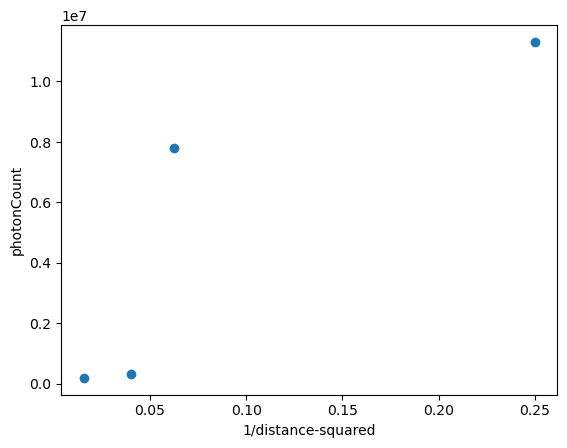

In [188]:
#highestFlashes dataframe to arrays
photonCountList = highestFlashes['Photon-Count'].to_numpy()
distanceList = highestFlashes['distance'].to_numpy()
xList=[0]*k

#x=1/d^2, find x for each d and store in parallel array
for a in range (0, k):
    xList[a]=1/(distanceList[a]**2)

#plot graph of x against photon count
plt.plot(xList, photonCountList, marker='o', ls="none")
plt.xlabel("1/distance-squared")
plt.ylabel("photonCount")
plt.show()


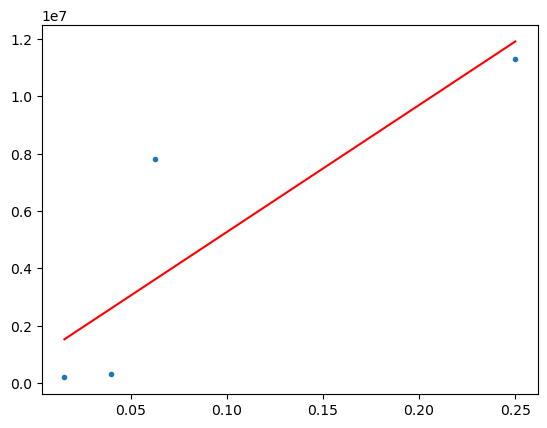

In [189]:
#plot line and find gradient m

A = numpy.vander(xList,2) 
# the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = numpy.linalg.lstsq(A,photonCountList)
#print('parameters: %.2f, %.2f' % (b[0],b[1]))
m=b[0]

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

plt.plot(xList,photonCountList,'.')
plt.plot(xList,reconstructed,'-r')


In [195]:
#find distance of every flash using photon count and m 
flashList = flashData['Photon-Count'].to_numpy()
l=len(flashList)
eList=[0]*l

for b in range (0,l):
    eList[b]=m/flashList[b]
dList=numpy.sqrt(eList) #list of new distances

#add new distances to flashData Dataframe 
flashData['distances'] = dList.tolist()

print(flashData)


[148690.66811419532, 107548.10460686943, 127327.06637365, 134272.17908494, 67855.77197248116, 101861.65309892001, 3.9183431202138785, 18555.20062731583, 117532.6766526, 121730.27224733571, 12577.297501569743, 33901.927389464574, 108869.3343931946, 9794.38972105, 113035.25280109745, 58766.3383263, 5.669318001422287, 129560.87455564387, 151228.05152911332, 87396.09289552308, 132.08753136914368, 107548.10460686943, 525.3152864649279, 108869.3343931946, 80417.09455177895, 56589.80727717778, 100022.16500684018, 58456.22572299499, 75485.21141061363, 129183.14605839709, 94076.04904040383, 71467.45015811324, 160542.82281895, 224.11181408420387, 92892.70251159371, 41027.61027595389, 536.6528891449393, 134680.30120981825, 40026.93685458916, 57173.96012649059, 88442.75269067904, 123425.67993880279, 51885.034072634895, 525.5271197062231, 92120.20602501082, 16171.466824098614, 103527.61471502384, 1577.0302558290994, 102569.02568988473, 35166.52309367476, 38297.16430253258, 45030.30396141281, 137608

In [ ]:
#loop through flashes 
#find galaxy that matches flash 
#upload flash distance to galaxy distance 
#export galaxy data as excel 